In [1]:
%run "..\src\utils\style_and_packages.ipynb"

# Beispiel: Dynamischer Vergrösserungsfaktor

## Aufgabenstellung


Das System in @fig-ems_dyn_verg_system_biegetrager zeigt einen Biegeträger, gelagert als einfacher Balken mit einer Auskragung. Dieser wird am Kragarm mit der dynamischen Last F(t) in vertikaler Richtung beansprucht. 

![Statisches System des Biegeträgers](../images/aufgabe_ems_dynamischer_vergroesserungsfaktor.svg){#fig-ems_dyn_verg_system_biegetrager}


Gesucht:

- Grundkreisfrequenz $\omega_1$
- Dynamischer Vergrösserungsfaktor $V(\omega)$
- Maximale dynamische Amplitude im stationären Fall $u_{max}$
  
Gegeben:

- Biegeträger ist masselos
- Es sind lediglich Biegeverformungen zu betrachten $G \cdot A = \infty$
$$
F(t) = F_0 \cdot \cos(\omega \cdot t) = 50 \text{kN} \cdot \cos(62.8 \cdot t)
$${#eq-ems_dyn_verg_anregung_dynamischer_faktor}

In [2]:
F_0, m, zeta, EI, l_1, l_2 = sp.symbols('F_0, m_, zeta, EI, l_1, l_2 ')

k, omega, t  = sp.symbols('k omega t')

In [3]:
#| label: tbl-parameter_vergroess
#| tbl-cap: Parameter der Aufgabenstellung

params = {F_0:50*10**3*unit.N,
          m:1000*unit.N*unit.second**2/unit.m,
          zeta:0.005,
          EI:30000*10**3*unit.N*unit.m**2,
          l_1:3000*unit.mm,
          l_2:2000*unit.mm,
          omega:62.8/unit.second}

params_plot = convert.param_value(params)

render.dict_to_table(params)

|   |   |
|---|---|
| $EI = 30000000 \text{m}^{2} \text{N}$ | $F_{0} = 50000 \text{N}$ |
| $l_{1} = 3000 \text{mm}$ | $l_{2} = 2000 \text{mm}$ |
| $m_{} = \frac{1000 \text{N} \text{s}^{2}}{\text{m}}$ | $\omega = \frac{62.8}{\text{s}}$ |
| $\zeta = 0.005$ | |


{{< pagebreak >}}

## Musterlösung



In [4]:
F_t = F_0*sp.cos(omega*t)

# render.eq_display('F(t)', F_t,
                #   'F(t)', F_t.subs(params))


### Eigenkreisfrequenz

Die Eigenkreisfrequenz lässt sich aus der folgenden Gleichung bestimmen:

$$
\omega_1 = \sqrt{\frac{k}{m}}
$${#eq-ems_dyn_verg_eigenkreisfreq}

#### Steifigkeit des Systems

Die Steifigkeit des Systems lässt sich anhand der statischen Deformation bestimmen. Sie entspricht dem Verhältnis zwischen Einwirkung und der daraus resultierenden Verformung.

$$
k = \frac{F}{u}
$${#eq-ems_dyn_verg_statdef}

Händisch lässt sich die Deformation mittels realem und virtuellem Kräftezustand, anhand der Arbeitsgleichung bestimmen. Dargestellt in @fig-ems_dyn_verg_arbeitssatz. Die Ermittlung der Steifigkeit bedingt lediglich das Verhältnis zwischen Einwirkung und Deformation, folglich darf Betrag der realen Kraft frei gewählt werden.

![Realer und virtueller Kräftezustand](../images/aufgabe_ems_dynamischer_vergroesserungsfaktor_my_my_fik.svg){#fig-ems_dyn_verg_arbeitssatz}

Um lediglich Biegeverformungen zu berücksichtigen, kann die Verformung mittels nachfolgender Gleichung bestimmt werden.

$$
u = \frac{1}{E I_y} \cdot \int_{0}^{l_1+l_2} M_y\bar{M_y} \,dx
$${#eq-ems_dyn_verg_deformation}



In [5]:
u_steifigkeit = 1/EI * (sp.Rational(1,3) * -2000*unit.N*unit.m * -2*unit.m * (l_1+l_2))
k = 1000*unit.N / u_steifigkeit


render.eq_display('u', u_steifigkeit,
                  'u', u_steifigkeit.subs(params).evalf(3),
                  'k', k,
                  'k', k.subs(params))

                        2       
    4000⋅(l₁ + l₂)⋅meter ⋅newton
u = ────────────────────────────
                3⋅EI            

u = 0.222⋅millimeter

           3⋅EI       
k = ──────────────────
                     2
    4⋅(l₁ + l₂)⋅meter 

    4500⋅newton
k = ───────────
     millimeter

#### Eigenkreisfrequenz

In [6]:
omega_1 = sp.sqrt(k/m)

render.eq_display(
                  'omega_1', omega_1,
                  'omega_1', omega_1.subs(params).simplify().evalf(3))

            _____________
           ╱      EI     
     √3⋅  ╱  ─────────── 
        ╲╱   m⋅(l₁ + l₂) 
ω₁ = ────────────────────
           2⋅meter       

      67.1 
ω₁ = ──────
     second

### Vergrösserungsfaktor

Der Vergrösserungsfaktor beschreibt das Verhältnis zwischen der maximalen statischen Amplitude und der maximalen dynamischen Amplitude:

$$V(\omega) = \frac{u_{max}}{u_0}$$

Dieser lässt sich mit der Dämpfungsrate $\zeta$, Anregungsfrequenz $\omega$ und der Eigenfrequenz $\omega_1$ beschreiben.


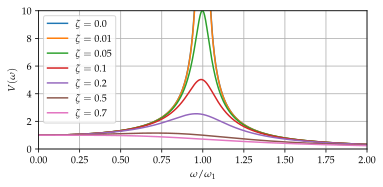

In [7]:
#| label: fig-ems_dyn_verg_vergroesserungsfaktor
#| fig-cap: "Einfluss der Dämpfung  und der Anregungsfrequenz auf den Vergrösserungsfaktor"

def plot_vergroesserungsfaktor():
    import numpy as np
    
    # Gleichung des Vergrösserungsfaktors
    def vergroesserungsfaktor(omega_omega_n, zeta):
        1/(sp.sqrt((1-(omega/omega_1)**2)**2 + (2*zeta*(omega/omega_1))**2))
        return 1/(np.sqrt((1-(omega_omega_n)**2)**2 + (2*zeta*(omega_omega_n))**2))
    
    omega_omega_n_array = np.linspace(0, 2, 1000)
    zeta_array = [0.00, 0.01, 0.05, 0.1, 0.2, 0.5, 0.7]


    # Plot
    fig = plt.figure(figsize=(5.9, 2.5))
    for z in zeta_array:
        plt.plot(omega_omega_n_array,vergroesserungsfaktor(omega_omega_n_array, z), label=f'$\zeta = {z}$')


    plt.grid()
    plt.xlabel('$\omega / \omega_1$')
    plt.ylabel('$V(\omega)$')
    plt.legend(loc='upper left')
    plt.xlim(0,2)
    plt.ylim(0,10)
    plt.show()
    
plot_vergroesserungsfaktor()

In [8]:
V_omega = 1/(sp.sqrt((1-(omega/omega_1)**2)**2 + (2*zeta*(omega/omega_1))**2))



render.eq_display('V(omega)', '1/(sqrt((1-(omega/omega_1)**2)**2 + (2*zeta_*(omega/omega_1))**2))',
                  'V(omega)', V_omega.subs(params).simplify().evalf(3))

                      1               
V(ω) = ───────────────────────────────
              ________________________
             ╱                      2 
            ╱     2  2   ⎛    2    ⎞  
           ╱   4⋅ω ⋅ζ    ⎜   ω     ⎟  
          ╱    ─────── + ⎜- ─── + 1⎟  
         ╱         2     ⎜    2    ⎟  
       ╲╱        ω₁      ⎝  ω₁     ⎠  

V(ω) = 8.07

### Statische Amplitude

Die Einwirkung lässt sich aus der Anregungsfunktion @eq-ems_dyn_verg_anregung_dynamischer_faktor bestimmen für $t=0$. Mit der bekannten Systemsteifigkeit bestimmt sich die Deformation.

In [9]:
u_stat = F_0 / k

render.eq_display('u_stat', 'F_0 / k',
                  'u_stat', u_stat,
                  'u_stat', u_stat.subs(params).evalf(4))

        F₀
uₛₜₐₜ = ──
        k 

                            2
        4⋅F₀⋅(l₁ + l₂)⋅meter 
uₛₜₐₜ = ─────────────────────
                 3⋅EI        

uₛₜₐₜ = 11.11⋅millimeter

#### Stationäre Amplitude

Durch die Vergrösserung der statischen Deformation mit dem Vergrösserungsfaktor resultiert die maximale Amplitude der stationären Lösung.


In [10]:
u_dyn = u_stat * V_omega

render.eq_display('u_dyn', 'u_stat * V(omega)',
                  'u_dyn', u_dyn,
                  'u_dyn', unit.convert_to(u_dyn.subs(params).simplify().evalf(3), unit.mm))

u_dyn = uₛₜₐₜ⋅V(ω)

                                                       2                      
                                   4⋅F₀⋅(l₁ + l₂)⋅meter                       
u_dyn = ──────────────────────────────────────────────────────────────────────
                   ___________________________________________________________
                  ╱                                                           
                 ╱        2  2                2   ⎛       2                2  
                ╱   16⋅m⋅ω ⋅ζ ⋅(l₁ + l₂)⋅meter    ⎜  4⋅m⋅ω ⋅(l₁ + l₂)⋅meter   
        3⋅EI⋅  ╱    ─────────────────────────── + ⎜- ─────────────────────── +
             ╲╱                 3⋅EI              ⎝            3⋅EI           

     
     
─────
_____
   2 
  ⎞  
  ⎟  
 1⎟  
  ⎠  

u_dyn = 89.6⋅millimeter

Der Nachweis der Gebrauchstauglichkeit wäre damit sicherlich nicht erfüllt.
Das Beispiel soll aufzeigen, wenn die Erregerfrequenz im Bereich der Eigenfrequenz zu liegen kommt, es zu grossen Amplifikationen der Verformungen bzw. zu Resonanzeffekten kommen kann. 

Da meist die Masse und die Erregung (z.B. Maschine) gegeben ist, kann man zum Beispiel ein Dämpfungselement einbauen, was jedoch keinen wesentlichen Einfluss auf das Frequenzverhältnis hat. Dadurch werden jedoch die Amplituden begrenzt. 

Eine weitere Möglichkeit wäre die Biegesteifigkeit $E\cdot I$ zu erhöhen. Das System wird steifer und die Eigenfrequenz grösser. Man spricht in dem Fall von einer Hochabstimmung.


In [11]:
u_p = V_omega.subs(params) * u_stat *sp.cos(omega *t)

# render.eq_display('u_p', u_p.subs(params).simplify().evalf(3))

In [12]:
omega_d = omega_1 * sp.sqrt(1-zeta**2)

# render.eq_display('omega_d', 'omega_1 *sqrt(1-zeta_**2)',
#                   'omega_d', omega_d.subs(params).simplify().evalf(3))

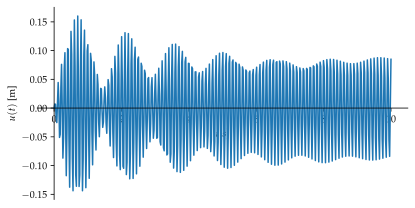

In [13]:
#| label: fig-ems_dyn_verg_gesamtantwort
#| fig-cap: "Gesamtantwort des Systems"


A_1, A_2 = sp.symbols('A_1:3')
omega_d_raw = omega_d*unit.second
omega_n_raw = omega_1 * unit.second
u_h_ansatz = sp.exp(-zeta*omega_n_raw*t)*(A_1 * sp.cos(omega_d_raw*t)+A_2*sp.sin(omega_d_raw*t))
randbedingung_1 = (u_h_ansatz+u_p).subs(t,0)
randbedingung_2 = sp.diff((u_h_ansatz+u_p),t).subs(t,0)

A_solve = sp.solve([randbedingung_1, randbedingung_2], [A_1, A_2], dict=True)[0]


u_h = u_h_ansatz.subs(A_solve)


u_t = u_h.subs(params).simplify()/unit.m + u_p.subs(params_plot).simplify()/unit.m**2

u_t_plot = u_t.subs(params_plot).subs(unit.second, 1)

plot_gesamt=sp.plot(u_t_plot, (t,0,10), adaptive=False, nb_of_points=500, 
        xlabel='$t [s]$',
        ylabel='$u(t)$ [m]',
        size=(5.9,3))




In der @fig-ems_dyn_verg_gesamtantwort ist die Gesamtantwort des Systems dargestellt. Wenn Dämpfung im System vorhanden ist, dann verschwindet die transiente bzw. homogene Lösung $u(t)$ und das System schwingt mit der stationären Lösung bzw. partikulären Lösung $u(t)$ in der Anregungsfrequenz. In Bezug auf die @fig-ems_dyn_verg_gesamtantwort schwingt das System am Anfang stärker, durch das Abklingen der Anfangsauslenkung durch die Dämpfung schwingt das System nur noch in der Anregungsfrequenz weiter. Die Anregung zwingt dem System seine Schwingung auf. In der Praxis sind die Anlaufphasen zu beachten, solange der transiente Teil noch nicht abgeklungen ist. Dort sind die Amplituden grösser und es gilt zu untersuchen, ob diese kurzfristige Überschreitung Konsequenzen (z.B. zul. Verformungen oder Bauteilspannungen) für das Tragsystem hat.